Instalamos en primer lugar el SDK de Ocean (software de D-Wave)

In [ ]:
!pip install dwave-ocean-sdk networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Ahora tenemos que configurar el entorno (se puede pulsar 'enter' para usar las opciones por defecto)

In [ ]:
!dwave setup

Optionally install non-open-source packages and configure your environment.

Do you want to select non-open-source packages to install (y/n)? [y]: 

D-Wave Drivers installed and up to date.

D-Wave Problem Inspector installed and up to date.

Creating the D-Wave configuration file.
Using the simplified configuration flow.
Try 'dwave config create --full' for more options.

Updating existing configuration file: /root/.config/dwave/dwave.conf
Available profiles: defaults
Profile (select existing or create new) [defaults]: 
Updating existing profile: defaults
Authentication token [DEV-3d8ab74ab2d68406133ecb510f05ac9a34ad5b4d]: 
Configuration saved.


Importamos las bibliotecas necesarias

In [ ]:
from dimod import Binary, ExactSolver
from networkx import Graph, draw
from dwave.samplers import SimulatedAnnealingSampler, SteepestDescentSampler
from dwave.system import DWaveSampler, EmbeddingComposite

Construimos una función para construir el modelo QUBO a partir del grafo

In [ ]:
def obtener_QUBO(G):
  nvars = len(G.nodes())
  var = [Binary(f'v{i}') for i in range (0,nvars)]
  qubo = -sum([(var[i]-var[j])**2 for i,j in G.edges()])
  return qubo

Definimos una función para obtener el muestreador (sampler) que tratará de resolver el problema

In [ ]:
def obtener_sampler():
  #return ExactSolver()
  #return SimulatedAnnealingSampler()
  #return SteepestDescentSampler()
  return EmbeddingComposite(DWaveSampler())

Usaremos el grafo del ejemplo

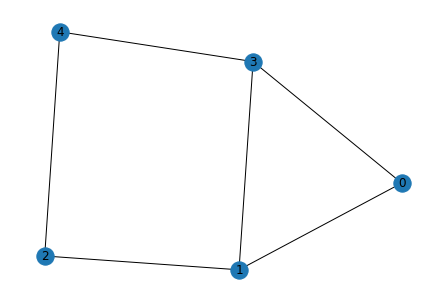

In [ ]:
G = Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0,1),(0,3),(1,2),(1,3),(2,4),(3,4)])
draw(G, with_labels=True)

Veamos qué aspecto tiene el QUBO para este grafo:

In [ ]:
qubo = obtener_QUBO(G)
qubo

BinaryQuadraticModel({'v0': -2.0, 'v1': -3.0, 'v3': -3.0, 'v2': -2.0, 'v4': -2.0}, {('v1', 'v0'): 2.0, ('v3', 'v0'): 2.0, ('v3', 'v1'): 2.0, ('v2', 'v1'): 2.0, ('v4', 'v3'): 2.0, ('v4', 'v2'): 2.0}, -0.0, 'BINARY')

Ahora calculamos la solución

In [ ]:
sampler = obtener_sampler()
resultado = sampler.sample(qubo, num_reads=10)
print(resultado)

  v0 v1 v2 v3 v4 energy num_oc. chain_.
0  0  0  1  1  0   -5.0       5     0.0
1  1  0  1  1  0   -5.0       2     0.0
2  1  1  0  0  1   -5.0       3     0.0
['BINARY', 3 rows, 10 samples, 5 variables]


In [ ]:
!dwave config create

Using the simplified configuration flow.
Try 'dwave config create --full' for more options.

Updating existing configuration file: /root/.config/dwave/dwave.conf
Available profiles: defaults
Profile (select existing or create new) [defaults]: 
Updating existing profile: defaults
Authentication token [DEV-3d8ab74ab2d68406133ecb510f05ac9a34ad5b4d]: DEV-3d8ab74ab2d68406133ecb510f05ac9a34ad5b4d
Configuration saved.
